In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pickle

from gpu import set_gpu
from matplotlib import pyplot as plt
import loop
import session
import plot_utils 
set_gpu()

plt.rcParams['figure.dpi'] = 300
%matplotlib qt

Using TensorFlow backend.


Num GPUs Available:  1


In [2]:
sub_type = 'AB'
with open('train_data_raw_'  + sub_type + '.p', 'rb') as f:
    raw, params,feat,feat_sq = pickle.load(f)

In [226]:
# Loop through training
train_dict = {'sub_type':sub_type,'n_train':'fullsomemix4', 'load':False, 'train_scale':5, 'epochs': 30, 'batch_size' : 128, 'sparsity':True,'dt':'manual','feat_type':'feat','noise':True, 'latent_dim':4,'mod':['lda'],'gens':50, 'mod_dt':'emgscaleall','train_grp':2}
train_sess = session.Session(**train_dict)

# loop through subjects
for sub_i in range(1,np.max(params[:,0])+1):
    for lat in range(4,5):
        train_sess.latent_dim = lat
        train_out = train_sess.loop_cv(raw,params,sub=sub_i,mod='all')
        # for key,val in train_out.items():
        #     exec(key + '=val')


Running sub 1, model 2, latent dim 4, cv 1
['loss', 'decoder_loss', 'clf_loss', 'clf_1_loss', 'decoder_accuracy', 'clf_accuracy', 'clf_1_accuracy']
[4.255 0.061 1.3   2.893 0.008 0.572 0.248]
[6.301 0.036 1.104 5.16  0.008 0.608 0.249]
[6.06  0.034 1.014 5.012 0.008 0.63  0.249]
[6.342 0.031 0.971 5.339 0.008 0.642 0.226]
[6.141 0.029 0.97  5.141 0.008 0.65  0.239]
[6.561 0.028 0.935 5.597 0.008 0.667 0.235]
[7.029 0.027 0.931 6.071 0.008 0.671 0.252]
[7.712 0.026 0.99  6.695 0.008 0.661 0.238]
[8.209 0.025 0.976 7.207 0.008 0.664 0.245]
[9.125 0.025 1.033 8.066 0.008 0.657 0.243]
[9.29  0.024 1.007 8.258 0.008 0.665 0.237]
[9.656 0.024 1.038 8.594 0.008 0.666 0.241]
[10.199  0.023  1.045  9.131  0.008  0.663  0.25 ]
[10.532  0.023  1.093  9.416  0.008  0.667  0.241]
[10.399  0.023  1.06   9.316  0.008  0.674  0.253]
[1.65  0.046 1.024 0.579 0.008 0.669 0.235]
[1.329 0.045 1.031 0.253 0.008 0.678 0.241]
[1.202 0.045 1.038 0.12  0.008 0.68  0.247]
[1.189 0.045 1.082 0.063 0.008 0.675 0.

In [ ]:
sub_type = 'TR'
with open('train_data_raw_'  + sub_type + '.p', 'rb') as f:
    raw, params,feat,feat_sq = pickle.load(f)

train_dict = {'sub_type':sub_type,'n_train':'fullallmix4', 'load':False, 'train_scale':5, 'epochs': 30, 'batch_size' : 128, 'sparsity':True,'dt':'manual','feat_type':'feat','noise':True, 'latent_dim':4,'mod':['lda'],'gens':50, 'mod_dt':'1028','train_grp':2}
train_sess = session.Session(**train_dict)

# loop through subjects
for sub_i in range(1,np.max(params[:,0])+1):
    for lat in range(1,11):
        train_sess.latent_dim = lat
        train_out = train_sess.loop_cv(raw,params,sub=sub_i,mod='all')
        # for key,val in train_out.items():
        #     exec(key + '=val')


In [7]:
train_dict = {'sub_type':sub_type,'n_train':'fullallmix4', 'load':False, 'train_scale':5, 'epochs': 30, 'batch_size' : 128, 'sparsity':True,'dt':'cv','feat_type':'feat','noise':True, 'latent_dim':4,'mod':['lda'],'gens':50, 'mod_dt':'1028','train_grp':2}
train_sess = session.Session(**train_dict)
svae, cnn,vcnn,ecnn = plot_utils.plot_latent_dim(params,train_sess)

c:\Users\yteh\Documents\work\git\projects\latent_rep\python\plot_utils.py:25: RuntimeWarning: Mean of empty slice
  # mean_acc = np.nanmean(np.nanmean(all_acc,axis=2),axis=0)
c:\Users\yteh\Documents\work\git\projects\latent_rep\python\plot_utils.py:26: RuntimeWarning: Mean of empty slice
  # mean_val = np.nanmean(np.nanmean(all_val,axis=2),axis=0)


In [ ]:
# reduce dimensions of inputs
sub = 2
test_dict = {'sub_type':sub_type,'dt':'manual', 'mod_dt':'1012','sparsity':True, 'load':True, 'batch_size':128, 'latent_dim':5, 'epochs':30,'train_scale':5, 'n_train':'fullgaussflat4', 'n_test':'partgauss4','feat_type':'feat', 'noise':True,'train_grp':2,'test_dt': 'noisescale'}
test_sess = session.Session(**test_dict)
ntype = 'gauss'
addon = True

if not addon:
    x_clean_lda = np.array([]).reshape(0,6)
    x_clean_noise = np.array([]).reshape(0,6)
    x_clean_sae = np.array([]).reshape(0,5)
    x_clean_cnn = np.array([]).reshape(0,5)
    x_clean_vcnn = np.array([]).reshape(0,5)
    y_clean = np.array([]).reshape(0,1)

    x_noisy_lda = np.array([]).reshape(0,6)
    x_noisy_noise = np.array([]).reshape(0,6)
    x_noisy_sae = np.array([]).reshape(0,5)
    x_noisy_cnn = np.array([]).reshape(0,5)
    x_noisy_vcnn = np.array([]).reshape(0,5)
    y_noisy = np.array([]).reshape(0,1)

if ntype == 'flat':
    test_max = 2
else:
    test_max = 6

for i in range(1,5):
    test_sess.n_test = 'part' + ntype + str(i)
    for test_scale in range(1,test_max):
        red_out = test_sess.reduce_latent(raw, params, sub, cv=1,test_scale=1)
        for key,val in red_out.items():
            exec(key + '=val')
        x_clean_lda = np.vstack([x_test_lda_red[:clean_size,:], x_clean_lda])
        x_clean_noise = np.vstack([x_test_noise_red[:clean_size,:], x_clean_noise])
        x_clean_sae = np.vstack([x_test_sae_red[:clean_size,:], x_clean_sae])
        x_clean_cnn = np.vstack([x_test_cnn_red[:clean_size,:], x_clean_cnn])
        x_clean_vcnn = np.vstack([x_test_vcnn_red[:clean_size,:], x_clean_vcnn])
        y_clean = np.vstack([y_test[:clean_size,:], y_clean])

        x_noisy_lda = np.vstack([x_test_lda_red[clean_size:,:], x_noisy_lda])
        x_noisy_noise = np.vstack([x_test_noise_red[clean_size:,:], x_noisy_noise])
        x_noisy_sae = np.vstack([x_test_sae_red[clean_size:,:], x_noisy_sae])
        x_noisy_cnn = np.vstack([x_test_cnn_red[clean_size:,:], x_noisy_cnn])
        x_noisy_vcnn = np.vstack([x_test_vcnn_red[clean_size:,:], x_noisy_vcnn])
        y_noisy = np.vstack([y_test[clean_size:,:], y_noisy])


In [27]:
# Plot reduced dimensions
plot_utils.plot_latent_rep(x_clean_lda, y_clean)
plot_utils.plot_latent_rep(x_clean_noise, y_clean)
plot_utils.plot_latent_rep(x_clean_sae, y_clean)
plot_utils.plot_latent_rep(x_clean_cnn, y_clean)
plot_utils.plot_latent_rep(x_clean_vcnn, y_clean)

In [28]:
plot_utils.plot_latent_rep(x_noisy_lda, y_noisy)
plot_utils.plot_latent_rep(x_noisy_noise, y_noisy)
plot_utils.plot_latent_rep(x_noisy_sae, y_noisy)
plot_utils.plot_latent_rep(x_noisy_cnn, y_noisy)
plot_utils.plot_latent_rep(x_noisy_vcnn, y_noisy)

In [33]:
x_all_lda = np.vstack([x_clean_lda,x_noisy_lda])
x_all_noise = np.vstack([x_clean_noise,x_noisy_noise])
x_all_sae = np.vstack([x_clean_sae,x_noisy_sae])
x_all_cnn = np.vstack([x_clean_cnn,x_noisy_cnn])
x_all_vcnn = np.vstack([x_clean_vcnn,x_noisy_vcnn])
y_all = np.vstack([y_clean, y_noisy])
plot_utils.plot_latent_rep(x_all_lda, y_all)
plot_utils.plot_latent_rep(x_all_noise, y_all)
plot_utils.plot_latent_rep(x_all_sae, y_all)
plot_utils.plot_latent_rep(x_all_cnn, y_all)
plot_utils.plot_latent_rep(x_all_vcnn, y_all)

In [54]:
test = np.array([[1,2,3],[-2.5,3,1],[2,1,4],[2,1,4]])
test2 = np.array([[-3.3,2,3],[-2.5,3,.2],[2,1,4],[2,1,4]])
test3 = np.stack([test,test2])

emg_scale = np.ones((4,1))
for i in range(np.shape(test3)[1]):
    print(i)
    emg_scale[i] = 5/np.max(np.abs(test3[:,i,:]))

test4 = test3*emg_scale

0
1
2
3


In [13]:
import os
import copy as cp
test_dict = {'sub_type':sub_type,'dt':'manual', 'mod_dt':'emgscaleall','sparsity':True, 'load':True, 'batch_size':128, 'latent_dim':4, 'epochs':30,'train_scale':5, 'n_train':'fullallmix4', 'n_test':'partgauss4','feat_type':'feat', 'noise':True,'train_grp':2,'test_dt':'noisescaleall'}
test_sess = session.Session(**test_dict) 

load = False
for posi in range(1,2):#5):
    ntype = 'real'# + str(posi)

    if ntype[:3] == 'pos' and not load:
        i_start = 4
        i_end = 5
        acc_all = np.full([np.max(params[:,0]), 3, 4, 15],np.nan)
        acc_clean = np.full([np.max(params[:,0]), 3, 4, 15],np.nan)
        acc_noise = np.full([np.max(params[:,0]), 3, 4, 15],np.nan)
    elif ntype == 'flat' or 'mix' in ntype or 'real' in ntype:
        i_start = 1
        i_end = 5
        acc_all = np.full([np.max(params[:,0]), 4, 1, 15],np.nan)
        acc_clean = np.full([np.max(params[:,0]), 4, 1, 15],np.nan)
        acc_noise = np.full([np.max(params[:,0]), 4, 1, 15],np.nan)
    else:
        i_start = 1
        i_end = 5
        acc_all = np.full([np.max(params[:,0]), 4, 5, 15],np.nan)
        acc_clean = np.full([np.max(params[:,0]), 4, 5, 15],np.nan)
        acc_noise = np.full([np.max(params[:,0]), 4, 5, 15],np.nan)

    for i in range(i_start,i_end):
        if load and 'pos' in ntype:
            test_sess.n_test = 'part' + ntype + str(i) + '4'
        else:
            test_sess.n_test = 'part' + ntype + str(i)    

        if load:
            for sub in range(1,np.max(params[:,0])):
                foldername = test_sess.create_foldername(ftype='results')
                filename = test_sess.create_filename(foldername,0,sub)
                print(filename)
                if os.path.isfile(filename + '_' + test_sess.n_test + '_cvresults.p'):
                    with open(filename + '_' + test_sess.n_test + '_cvresults.p', 'rb') as f:
                        temp_all, temp_noise, temp_clean = pickle.load(f)
                    acc_all[sub-1,i-i_start,:,:], acc_clean[sub-1,i-i_start,:,:], acc_noise[sub-1,i-i_start,:,:] = np.squeeze(temp_all),np.squeeze(temp_clean),np.squeeze(temp_noise)
        else:
            test_out = test_sess.loop_test(raw, params)
            for key,val in test_out.items():
                exec(key + '=val')

    ave_pos_noise= np.nanmean(acc_noise,axis=0)
    ave_pos_clean = np.nanmean(acc_clean,axis=0)
    ave_noise= np.nanmean(acc_noise,axis=2)
    ave_clean = np.nanmean(acc_clean,axis=2)
    ave_gauss_noise = np.nanmean(ave_noise,axis=0)
    ave_gauss_clean = np.nanmean(ave_clean,axis=0)

    if 'gauss' in ntype:
        ave_gauss= cp.deepcopy(ave_noise)
    elif 'flat' in ntype:
        ave_flat = cp.deepcopy(ave_noise)
    elif '60hz' in ntype:
        ave_60hz = cp.deepcopy(ave_noise)
    elif 'mix' in ntype:
        ave_mix = cp.deepcopy(ave_noise)

# out_dict['ave_' + ntype] = cp.deepcopy(ave_noise)

results_2_manual_noisescaleall/AB1_feat_dim_4_ep_30_bat_128_fullallmix4_5_lr_10_sparse
results_2_manual_noisescaleall/AB2_feat_dim_4_ep_30_bat_128_fullallmix4_5_lr_10_sparse
results_2_manual_noisescaleall/AB3_feat_dim_4_ep_30_bat_128_fullallmix4_5_lr_10_sparse
results_2_manual_noisescaleall/AB4_feat_dim_4_ep_30_bat_128_fullallmix4_5_lr_10_sparse
results_2_manual_noisescaleall/AB5_feat_dim_4_ep_30_bat_128_fullallmix4_5_lr_10_sparse
results_2_manual_noisescaleall/AB6_feat_dim_4_ep_30_bat_128_fullallmix4_5_lr_10_sparse
results_2_manual_noisescaleall/AB7_feat_dim_4_ep_30_bat_128_fullallmix4_5_lr_10_sparse
results_2_manual_noisescaleall/AB8_feat_dim_4_ep_30_bat_128_fullallmix4_5_lr_10_sparse
results_2_manual_noisescaleall/AB9_feat_dim_4_ep_30_bat_128_fullallmix4_5_lr_10_sparse
results_2_manual_noisescaleall/AB10_feat_dim_4_ep_30_bat_128_fullallmix4_5_lr_10_sparse
results_2_manual_noisescaleall/AB11_feat_dim_4_ep_30_bat_128_fullallmix4_5_lr_10_sparse
results_2_manual_noisescaleall/AB12_feat_

C:\ProgramData\Anaconda3\envs\tf-2\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: Mean of empty slice
C:\ProgramData\Anaconda3\envs\tf-2\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: Mean of empty slice
C:\ProgramData\Anaconda3\envs\tf-2\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: Mean of empty slice
C:\ProgramData\Anaconda3\envs\tf-2\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: Mean of empty slice
C:\ProgramData\Anaconda3\envs\tf-2\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: Mean of empty slice
C:\ProgramData\Anaconda3\envs\tf-2\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: Mean of empty slice


In [82]:
# out_dict = {}
ave_gauss = out_dict['ave_posrealbreak']
ave_mix = out_dict['ave_posrealmix']
ave_flat = out_dict['ave_posrealmove']

In [46]:
for key in out_dict:
    print(key)

ave_posrealbreak
ave_posrealcontactbig
ave_posrealmove
ave_posrealmix


In [59]:
plot_utils.plot_summary(ave_clean,ave_gauss,ave_mix,ave_flat)

c:\Users\yteh\Documents\work\git\projects\latent_rep\python\plot_utils.py:206: RuntimeWarning: Mean of empty slice
  ave_diff_gauss = np.nanmean(np.nanmean(all_gauss_diff,axis=1),axis=0)
c:\Users\yteh\Documents\work\git\projects\latent_rep\python\plot_utils.py:207: RuntimeWarning: Mean of empty slice
  ave_diff_60hz = np.nanmean(np.nanmean(all_60hz_diff,axis=1),axis=0)
c:\Users\yteh\Documents\work\git\projects\latent_rep\python\plot_utils.py:208: RuntimeWarning: Mean of empty slice
  ave_diff_flat = np.nanmean(np.nanmean(all_flat_diff,axis=1),axis=0)
c:\Users\yteh\Documents\work\git\projects\latent_rep\python\plot_utils.py:209: RuntimeWarning: Mean of empty slice
  ave_diff_clean = np.nanmean(np.nanmean(all_clean_diff,axis=1),axis=0)
c:\Users\yteh\Documents\work\git\projects\latent_rep\python\plot_utils.py:213: RuntimeWarning: Mean of empty slice
  diff_clean = np.nanmean(all_clean_diff,axis=0)


In [10]:
# plot accuracy vs # noisy electrodes
plot_utils.plot_electrode_results(ave_gauss_noise,ave_gauss_clean,test_sess.n_train,ntype,test_sess.sub_type)

In [23]:
# plot accuracy vs. position
plot_utils.plot_pos_results(ave_pos_noise)

In [159]:
with open('real_noise/all_real_noise.p', 'rb') as f:
    real_noise_temp, _ = pickle.load(f)

In [207]:
# test = np.ndarray.flatten(real_noise_temp[0,:,:])
out = np.squeeze(np.zeros((200*1000//8,5)))
t = np.linspace(0,200//8,200*1000//8)
fig, ax = plt.subplots(5,1)
for ch in range(5):
    it = 0
    for i in range(0,1000,8):
        out[it*200:it*200+200,ch] = real_noise_temp[ch,i,:]
        it += 1
    ax[ch].plot(t,out[:,ch])
    ax[ch].set_ylim([-5,5])
    ax[ch].set_xlim([0,200//8])
    if ch < 4:
        ax[ch].set_xticks([])
    # ax[ch].tight_layout()

In [214]:
import process_data as prd
foldername = test_sess.create_foldername()
filename = test_sess.create_filename(foldername, 1, 1)
test_sess.n_test = 'partrealbreaknm3'

with open(filename + '.p', 'rb') as f:
    scaler, svae_w, svae_enc_w, svae_dec_w, svae_clf_w, sae_w, sae_enc_w, sae_clf_w, cnn_w, cnn_enc_w, cnn_clf_w, vcnn_w, vcnn_enc_w, vcnn_clf_w, ecnn_w, ecnn_enc_w, ecnn_clf_w, w_svae, c_svae, w_sae, c_sae, w_cnn, c_cnn, w_vcnn, c_vcnn, w_ecnn, c_ecnn, w, c, w_noise, c_noise, mu, C, qda, qda_noise,emg_scale = pickle.load(f)   

_, x_test, _, _, p_test, _ = prd.train_data_split(raw,params,4,test_sess.sub_type,dt=test_sess.dt,train_grp=4)
x_test = x_test * emg_scale
x_test_noise, x_test_clean, y_test_clean = prd.add_noise(x_test, p_test, 4, test_sess.n_test, 1, real_noise=real_noise_temp, emg_scale = emg_scale)
x_test_noise[x_test_noise > 5] = 5
x_test_noise[x_test_noise < -5] = -5

Loading training data: traindata_manual/TR4_traindata_4.p


In [215]:
fig, ax = plt.subplots(6,1)
fig2, ax2 = plt.subplots(6,1)
ind = np.random.randint(np.size(x_test,0),np.size(x_test_noise,0))
print(ind)
for ch in range(6):
    ax[ch].plot(x_test_clean[ind,ch,:])
    ax2[ch].plot(x_test_noise[ind,ch,:])
    ax[ch].set_ylim([-5,5])
    ax2[ch].set_ylim([-5,5])
    ax[0].set_title(str(np.argmax(y_test_clean[ind,:])))

2821


## OLD

In [15]:
## Plot training metrics trajectories
# initialize parameters
train_grp = 2
dt = 'cv'
feat_type = 'feat'
latent_dim = 5
epochs = 30
n_train = 'fullgaussflat4'
train_scale = 5
foldername = 'models' + '_' + str(train_grp) + '_' + dt
batch_size = 128
n_test = 0
lr = 0.001

# initialize loss and accuracy matrices
loss = np.full([4,4,epochs],np.nan)
val_loss = np.full([4,4,epochs],np.nan)
acc = np.full([4,4,epochs],np.nan)
val_acc = np.full([4,4,epochs],np.nan)

# loop through subjects
for sub in range(1,2):#6):
    # loop through cross validations
    for cv in range(1,5):
        # load data
        filename = foldername + '/' + sub_type + str(sub) + '_' + feat_type + '_dim_' + str(latent_dim) + '_ep_' + str(epochs) + '_bat_' + str(batch_size) + '_' + n_train + '_' + str(train_scale) + '_lr_' + str(int(lr*10000)) 
        filename += '_cv_'+ str(cv) + '_sparse'
        with open(filename + '_hist.p', 'rb') as f:
            svae_hist, sae_hist, cnn_hist, vcnn_hist = pickle.load(f)

        svae_hist = np.transpose(svae_hist)

        # compile losses and accuracies (uncomment back if all models have same # epochs)
        loss[cv-1,:2,:] = np.array([svae_hist[2,:], sae_hist['loss']])#, cnn_hist['loss'], vcnn_hist['loss']])
        val_loss[cv-1,:2,:] = np.array([svae_hist[9,:], sae_hist['val_loss']])#, cnn_hist['val_loss'], vcnn_hist['val_loss']])
        acc[cv-1,:2,:] = np.array([svae_hist[5,:], sae_hist['accuracy']])#, cnn_hist['accuracy'], vcnn_hist['accuracy']])
        val_acc[cv-1,:2,:] = np.array([svae_hist[-2,:], sae_hist['val_accuracy']])#, cnn_hist['val_accuracy'], vcnn_hist['val_accuracy']])

        # 0-30 for 30 epochs
        loss[cv-1,2:,0:30] = np.array([cnn_hist['loss'], vcnn_hist['loss']])
        val_loss[cv-1,2:,0:30] = np.array([cnn_hist['val_loss'], vcnn_hist['val_loss']])
        acc[cv-1,2:,0:30] = np.array([cnn_hist['accuracy'], vcnn_hist['clf_accuracy']])
        val_acc[cv-1,2:,0:30] = np.array([cnn_hist['val_accuracy'], vcnn_hist['val_clf_accuracy']])

    # load results
    resultsfile = filename
    # with open(resultsfile + '_results.p', 'rb') as f:
    #     acc_all, acc_clean, acc_noise = pickle.load(f)

    # average metrics over cvs
    ave_loss = np.mean(loss,axis=0)
    ave_val_loss = np.mean(val_loss,axis=0)
    ave_acc = np.mean(acc,axis=0)
    ave_val_acc = np.mean(val_acc,axis=0)

    # plot metrics over epochs
    plt.figure(sub)
    for i in range(0,4):
        ax = plt.subplot(2,2,i+1)
        ax.plot(ave_loss[i])
        ax.plot(ave_val_loss[i])
        # ax.set_ylim(0,5)
    plt.figure(sub+1)
    for i in range(0,4):
        ax2 = plt.subplot(2,2,i+1)
        ax2.plot(ave_acc[i])
        ax2.plot(ave_val_acc[i])
        ax2.set_ylim(0,1)

FileNotFoundError: [Errno 2] No such file or directory: 'models_2_cv/TR1_feat_dim_5_ep_30_bat_128_fullgaussflat4_5_lr_10_cv_1_sparse_hist.p'

In [ ]:
# Plot generated or reconstructed features
col = ['k','b','r','g','c','y','m']
fig = plt.figure()

# number of channels
ch_max = x_noise.shape[1]

# number of classes
cl_max = y_train.shape[1]

# loop through channels
for i in range(0,ch_max-1):
    ax = plt.subplot(6,1,i+1)

    # loop through classes
    for cl in range(2,3):
        # index inputs from current class
        x_noise_cl = x_noise[y_train[:,cl]==1,i,:]
        x_clean_cl = x_clean[y_train[:,cl]==1,i,:]
        dec_ind = gen_clf == cl

        ## plot all noisy features
        # for x_all in range(0,x_noise_cl.shape[0]):
        #     ax.plot(x_noise_cl[x_all,:,0],col[cl],linewidth=1)

        ## plot all clean features
        for x_all in range(0,x_clean_cl.shape[0]):
            ax.plot(x_clean_cl[x_all,:,0],col[cl],linewidth=.5,linestyle='-')

        ## plot all decoder output
        max_gen = 100
        ax.plot(np.transpose(dec_out[dec_ind,i,:,0][:max_gen,:]),col[cl+1],linewidth=.5,linestyle='--')
        
        ## plot mean of noisy features
        # ax.plot(np.mean(x_cl[:x_cl.shape[0],:,0],axis=0),col[cl],linewidth=1)

        ## plot mean of clean features
        # ax.plot(np.mean(x_clean_cl[:x_clean_cl.shape[0],:,0],axis=0),col[cl],linewidth=1,linestyle=':')

        ## plot mean of reconstructed output
        # rec_cl = dec_out[y_train[:,cl]==1,i,:]
        # ax.plot(np.mean(rec_cl[:,:,0],axis=0),col[cl],linewidth=1,linestyle='--')
        
        ## plot mean of decoder output
        # ax.plot(np.mean(np.transpose(dec_out[dec_ind,i,:,0]),axis=1),col[cl+1],linewidth=.5,linestyle='--')

    ax.set_ylim([0,1])

In [7]:
# Load noise results
sub_all, sub_noise, sub_clean, ave_all, ave_noise, ave_clean = loop.ave_results(params, sub_type, train_grp=2, feat_type='feat',epochs=30,n_train='fullgaussflat4',train_scale=5,n_test='partgauss2', latent_dim=4,loop_i='noise', dt='cv')
sub_all, sub_noise, sub_clean, flat_ave_all, flat_ave_noise, flat_ave_clean = loop.ave_results(params, sub_type, train_grp=2, feat_type='feat',epochs=30,n_train='fullgaussflat4',train_scale=5,n_test='partflat2', latent_dim=4,loop_i='noise',dt='cv')

NameError: name 'flat_ave_noise' is not defined

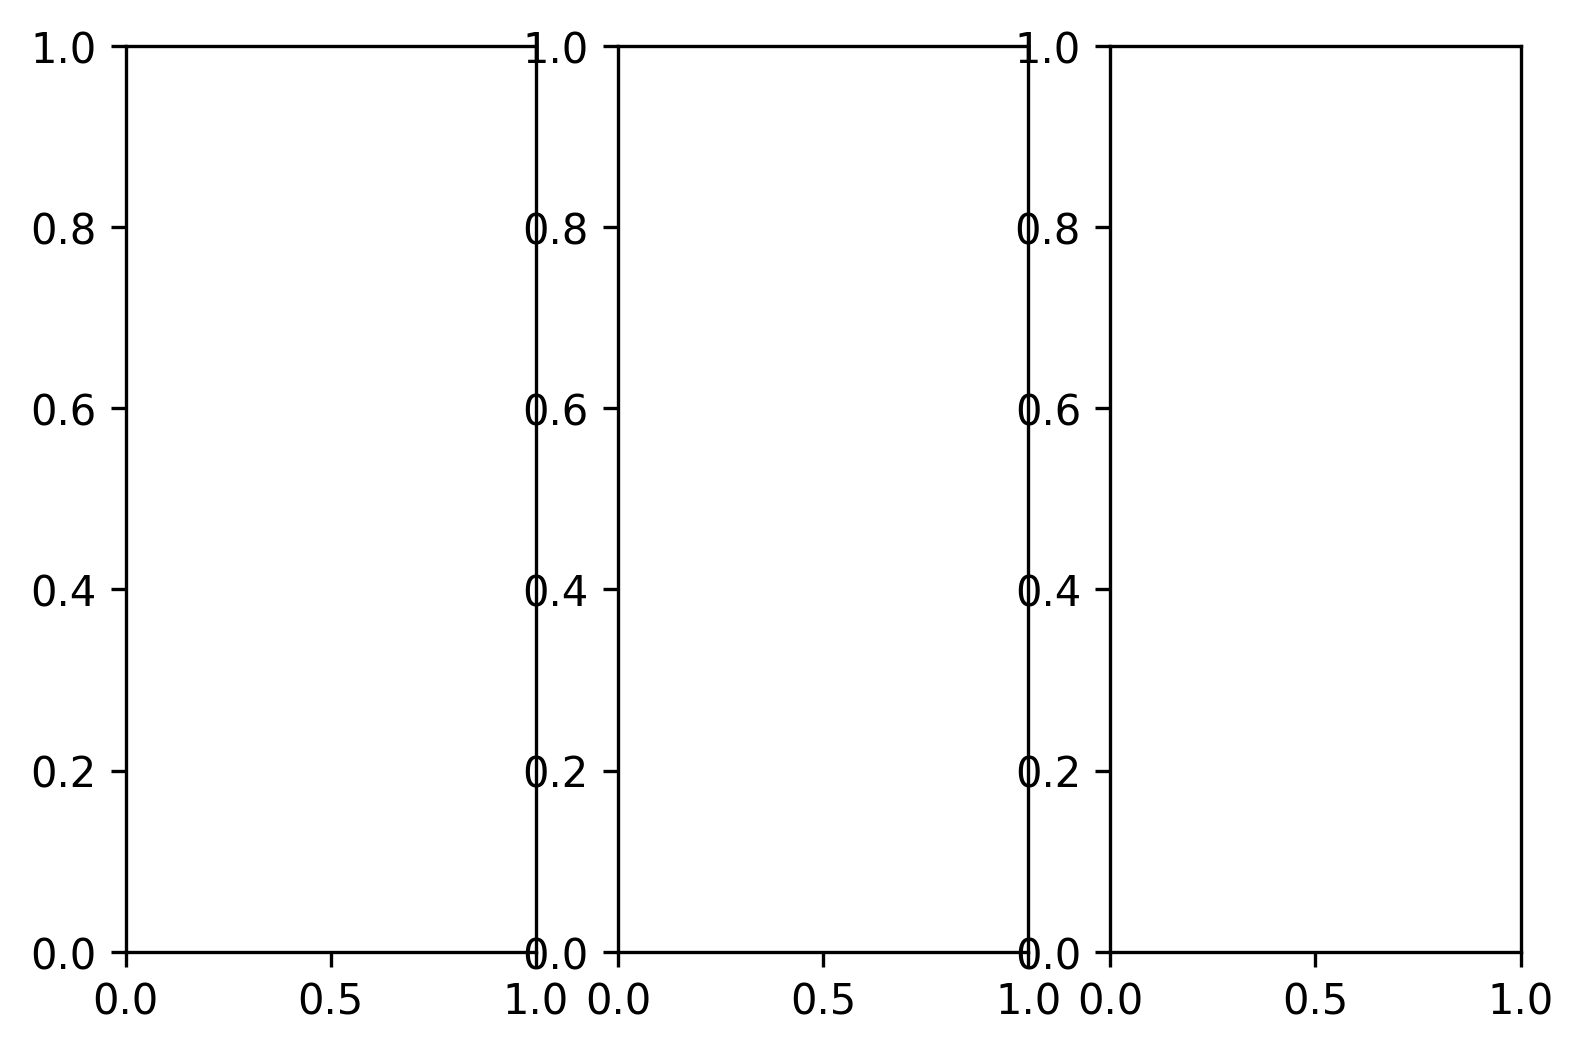

In [7]:
# Plot accuracy vs. noise
fig,ax = plt.subplots(1,3)
for i in range(0,4):
    ax[0].plot(np.hstack((flat_ave_noise[:,i],ave_noise[:,i])),'-o')
for i in range(4,9):    
    ax[1].plot(np.hstack((flat_ave_noise[:,i],ave_noise[:,i])),'-o')
for i in range(9,14):    
    ax[2].plot(np.hstack((flat_ave_noise[:,i],ave_noise[:,i])),'--o')
ax[0].set_ylabel('Accuracy')
fig.text(0.5, 0, 'Type of Noise', ha='center')
ax[0].legend(['svcnn','sae','cnn','vcnn'])
ax[1].legend(['svcnn-lda','sae-lda','cnn-lda','vcnn-lda','rec-lda'])
ax[2].legend(['LDA','LDA-corrupt','QDA','QDA-corrupt','ch'])
ax[1].set_yticks([])
ax[2].set_yticks([])
for i in range(0,3):
    ax[i].set_ylim(0,1)
    ax[i].set_xticks(range(0,6))
    ax[i].set_xticklabels(['Flat','1','2','3','4','5'])

fig.set_tight_layout(True)

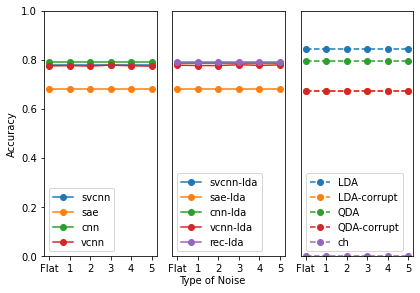

In [10]:
# Plot accuracy vs. noise
fig,ax = plt.subplots(1,3)
for i in range(0,4):
    ax[0].plot(np.hstack((flat_ave_clean[:,i],ave_clean[:,i])),'-o')
for i in range(4,9):    
    ax[1].plot(np.hstack((flat_ave_clean[:,i],ave_clean[:,i])),'-o')
for i in range(9,14):    
    ax[2].plot(np.hstack((flat_ave_clean[:,i],ave_clean[:,i])),'--o')
ax[0].set_ylabel('Accuracy')
fig.text(0.5, 0, 'Type of Noise', ha='center')
ax[0].legend(['svcnn','sae','cnn','vcnn'])
ax[1].legend(['svcnn-lda','sae-lda','cnn-lda','vcnn-lda','rec-lda'])
ax[2].legend(['LDA','LDA-corrupt','QDA','QDA-corrupt','ch'])
ax[1].set_yticks([])
ax[2].set_yticks([])
for i in range(0,3):
    ax[i].set_ylim(0,1)
    ax[i].set_xticks(range(0,6))
    ax[i].set_xticklabels(['Flat','1','2','3','4','5'])

fig.set_tight_layout(True)

In [3]:
# Loop through noise
acc_all, acc_noise, acc_clean, file_name = loop.loop_noise(raw, params, sub_type, load=False, n_train='fullgaussflat4', train_scale=5, n_test=0,epochs=30, batch_size = 128, sparsity=True,dt='cv',feat_type='feat',noise=True, latent_dim=4)

10 - clf_loss: 0.7969 - decoder_accuracy: 0.0039 - clf_accuracy: 0.6803 - val_loss: 1.0422 - val_decoder_loss: 0.0800 - val_clf_loss: 0.9572 - val_decoder_accuracy: 0.0020 - val_clf_accuracy: 0.6190
Epoch 11/30
18900/18900 [==============================] - 2s 126us/sample - loss: 0.8524 - decoder_loss: 0.0848 - clf_loss: 0.7650 - decoder_accuracy: 0.0039 - clf_accuracy: 0.6941 - val_loss: 1.0159 - val_decoder_loss: 0.0789 - val_clf_loss: 0.9367 - val_decoder_accuracy: 0.0020 - val_clf_accuracy: 0.6186
Epoch 12/30
18900/18900 [==============================] - 2s 115us/sample - loss: 0.8229 - decoder_loss: 0.0882 - clf_loss: 0.7323 - decoder_accuracy: 0.0039 - clf_accuracy: 0.7081 - val_loss: 0.9926 - val_decoder_loss: 0.0857 - val_clf_loss: 0.9000 - val_decoder_accuracy: 0.0020 - val_clf_accuracy: 0.6271
Epoch 13/30
18900/18900 [==============================] - 2s 114us/sample - loss: 0.8014 - decoder_loss: 0.0913 - clf_loss: 0.7074 - decoder_accuracy: 0.0039 - clf_accuracy: 0.7258 -

## Latent Dimension Loop

In [ ]:
# loop through latent dimensions
sub_all, sub_noise, sub_clean, file_name = loop.loop_alldim(raw, params, sub_type, load=False, n_train='gaussflat', train_scale=3, n_test='gauss', test_scale=1,epochs=30, sparsity=True, dt='0414')

In [ ]:
# load results from latent dimension loop, sparse vs. not sparse
sub_all, sub_noise, sub_clean, sparse_all, sparse_noise, sparse_clean = loop.load_results(params, sub_type=sub_type,sparsity=True, dt='0414')
sub_all, sub_noise, sub_clean, ave_all, ave_noise, ave_clean = loop.load_results(params, sub_type=sub_type,sparsity=False, dt='0414')

In [ ]:
# Plot accuracy vs. latent dimension
fig,ax = plt.subplots(1,2)
for i in range(0,4):
    ax[0].plot(ave_noise[:,i],'-o')
    ax[1].plot(sparse_noise[:,i],'-o')
ax[0].set_ylabel('Accuracy')
fig.text(0.5, 0.04, 'Latent Dimension', ha='center')
ax[0].set_ylim(0.5,1)
ax[1].set_ylim(0.5,1)
ax[0].legend(['svcnn','sae','cnn','vcnn'])